PROYECTO FINAL

#**Encuenta de satisfacción de los pasajeros de una aerolínea**
---

# **1. Abstract**

- **Contexto comercial**

    El equipo de marketing de una gran aerolínea se ocupa de medir el nivel de satisfacción de los pasajeros de los distintos vuelos que tiene la aerolínea. Los pasajeros que son analizados pertenecen a una base de datos que posee clientes con diversas edades, que han realizado vuelos de diversas distancias (vuelos cortos y largos), han volado por diversos motivos y en diferente clase (Business, Económica, Económica Plus).

    Se ha evaluado de forma particular diferentes aspectos o variables relacionadas con el vuelo (por ej. el servicio de entretenimiento a bordo, el servicio de wifi a bordo, etc.). Todo esto permite concluir el nivel de satisfacción ("satisfecho" o "neutro o insatisfecho") del pasajero referida a su experiencia volando con la aerolínea.

- **Problema comercial**

    Es función del equipo de marketing determinar qué variables son las determinantes para que un pasajero se encuentre "satisfecho" o "neutral o insatisfecho".

- **Objetivo**

    Diseñar un sistema que permita detectar patrones en las elecciones de los diversos aspectos evaluados en el vuelo que permita identificar anticipadamente su nivel de satisfacción.

- **Preguntas a responder**

    Preguntas principales

    *¿Es posible clasificar a los pasajeros en "satisfechos" o "neutrales o insatisfechos" a través de un modelo? ¿Existen patrones particulares en los pasajeros que se encuentran "satisfechos" o "neutrales o insatisfechos"?
    ¿Qué particularidades tienen los pasajeros que tienen el nivel de satisfacción "satisfecho"? ¿Y cuáles el "neutral o insatisfecho"?*

    Preguntas secundarias
    - *¿Qué edad tienen los pasajeros?*
    - *¿Qué distancia tienen los vuelos realizados por los pasajeros encuestados?*
    - *¿Qué clase utilizaron los pasajeros para viajar?*
    - *¿Qué nivel de satisfacción tienen los pasajeros?*
    - *¿Hay relaciones entre las variables del dataframe?*
    

- **Contexto analítico**

    El equipo de bases de datos le ha proporcionado datos sobre todas las encuestas respondidas por los pasajeros.

    El caso se estructura de la siguiente manera, vamos a:
    1. Realizar un pre-análisis de datos para iniciar con la exploración de los datos.
    2. Realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos y contestar las preguntas o hipótesis planteadas.
    3. Utilizar estas observaciones para obtener ciertos patrones que permitan obtener insights.
    4. Segmentar y generar conclusiones sobre grupos específicos.
    5. Clasificar las observaiones según la variable objetivo ***satisfaction*** ("satisfecho" o "neutral o insatisfecho").

Fuente de datos: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

#**2. Data Acquisition**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
url='https://raw.githubusercontent.com/diegosanchezkramm/Coderhouse_Data_Science/main/train.csv'
df= pd.read_csv(url, index_col=0)

In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.shape

(103904, 24)

El archivo "train.csv" posee un dataset con 103.904 registros de pasajeros que muestra por un lado, información relacionada al vuelo y por otro lado, información referida al nivel de satisfacción que tuvo ese pasajero durante el vuelo. Las 24 variables que posee el dataset son las siguientes:

- *id*
- *Gender*: Género
- *Customer Type*: Tipo de cliente (cliente fiel o desleal)
- *Age*: Edad
- *Type of Travel*: Tipo de viaje (personal o negocios)
- *Class*: Clase (Business, Económico, Económico Plus)
- *Flight Distance*: Distancia del vuelo
- *Inflight wifi service*: Servicio del wifi a bordo (nivel de satisfacción del 0 al 5)
- *Departure/Arrival time convenient*: Hora de salida/llegada conveniente (nivel de satisfacción)
- *Ease of Online booking*: Facilidad de reserva en línea (nivel de satisfacción)
- *Gate location*: Ubicación de la puerta: nivel de satisfacción de la ubicación de la puerta
- *Food and drink*: Alimentos y bebidas (nivel de satisfacción)
- *Online boarding*: Embarque en línea (Nivel de satisfacción)
- *Seat comfort*: Comodidad del asiento (Nivel de satisfacción)
- *Inflight entertainment*: Entretenimiento a bordo (Nivel de satisfacción)
- *On-board service*: Servicio general del vuelo (Nivel de satisfacción)
- *Leg room service*: Servicio referido al espacio para las piernas entre asientos (Nivel de satisfacción)
- *Baggage handling*: Manejo de equipaje (Nivel de satisfacción)
- *Checkin service*: Servicio de Check-in (Nivel de satisfacción)
- *Inflight service*: Servicio a bordo (Nivel de satisfacción)
- *Cleanliness*: Limpieza (Nivel de satisfacción)
- *Departure Delay in Minutes*: Retraso de salida en minutos (Minutos de retraso en la salida)
- *Arrival Delay in Minutes*: Retraso de llegada en minutos (Minutos de retraso en la llegada)
- *satisfaction*: Satisfacción (Nivel de satisfacción de la aerolínea: Satisfacción, neutral o insatisfacción)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

Se puede observar que la variable *Arrival Delay in Minutes* posee datos nulos.



In [ ]:
df.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


#**3. Data Wrangling**

## 3.1. Reemplazo de valores nulos

In [ ]:
#Identificamos los valores nulos

valores_nulos= df.columns[df.isnull().any()]
print(valores_nulos)

Index(['Arrival Delay in Minutes'], dtype='object')


In [ ]:
# Se identifica que los valores nulos sólo se encuentran en la columna "Arrival Delay in Minutes"
filas_con_nulos = df[df['Arrival Delay in Minutes'].isnull()]
filas_con_nulos

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


Como se observa existen 310 filas que poseen valores nulos (NaN) en la columna "Arrival Delay in Minutes"

In [ ]:
# Se determina cuantos registros con valores nulos hay por clase (Class)
nulos_por_clase= df[df['Arrival Delay in Minutes'].isnull()].groupby('Class').size()
nulos_por_clase

Class
Business    132
Eco         152
Eco Plus     26
dtype: int64

In [ ]:
# Se eliminan las filas donde la columna "Arrival Delay in Minutes" tiene valores nulos
df_sin_NaN=df_sin_nulos = df.dropna(subset=['Arrival Delay in Minutes'])
df_sin_NaN

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
# No quedan valores nulos
df_sin_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     1035

In [ ]:
# Se Obtiene el promedio de demora (Arrival Delay in Minutes) por clase
promedio_por_clase= df_sin_NaN.groupby('Class')['Arrival Delay in Minutes'].mean()
promedio_por_clase

Class
Business    14.577272
Eco         15.672183
Eco Plus    16.088645
Name: Arrival Delay in Minutes, dtype: float64

In [ ]:
# Se reemplaza en el df original los valores NaN por los promedios de demora por clase
df['Arrival Delay in Minutes'].fillna(df['Class'].map(promedio_por_clase), inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [ ]:
# Se controla que los valores NaN de la columna "Arrival Delay in Minutes" hayan sido reemplazados por el promedio por clase (Class) (Se toman 2 ejemplos: id 49608 y id 71178)
control = df.loc[(df['id']== 49608) | (df['id']== 71178)]
control

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,15.672183,satisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,14.577272,neutral or dissatisfied


## 3.2. Eliminación de valores outliers

La variable *Flight Distance* posee valores outliers. Para determinar los mismos, primero se realiza la estandarización de la variable y se grafica. Por este motivo se realiza un histograma en el cual se puede apreciar la existencia de observaciones con mas de 3 desviaciones estándar (outliers univariados).

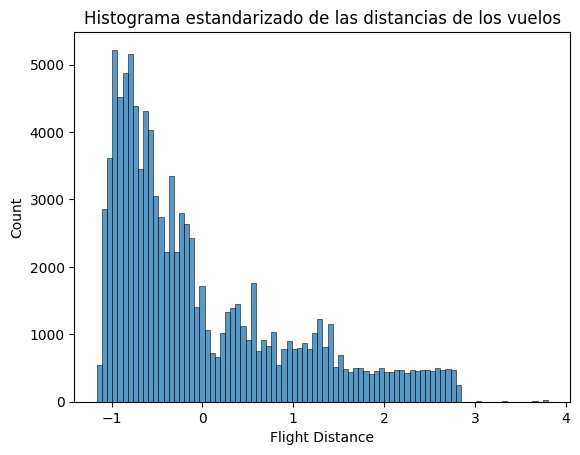

In [ ]:
# Se grafica la variable Flight Distance estandarizada
sns.histplot( (df['Flight Distance']-df['Flight Distance'].mean())/df['Flight Distance'].std() )
plt.title('Histograma estandarizado de las distancias de los vuelos');

Para obtener mayor especificación en la determinación de los valores outlier a continuación se detectan los mismos a través del criterio del IQR sobre la variable *Flight Distance*.

In [ ]:
# Se obtienen los valores outliers
iqr = df['Flight Distance'].quantile(0.75) - df['Flight Distance'].quantile(0.25)
limite = df['Flight Distance'].quantile(0.75) + 1.5*iqr
outlier_por_iqr = df[df['Flight Distance'] > limite].index
outlier_por_iqr

Int64Index([    80,    173,    201,    215,    379,    388,    421,    446,
               458,    473,
            ...
            103357, 103448, 103512, 103534, 103553, 103565, 103648, 103727,
            103865, 103889],
           dtype='int64', length=2291)

Se tomó la decisión de eliminar los valores atípicos del dataset para continuar con el análisis exploratorio de datos (EDA) y la selección del algoritmo.

In [ ]:
# Se eliminar los outliers del dataset
df2 = df.drop(outlier_por_iqr)
df2.shape

(101613, 24)

Finalmente, se obtiene como resultado un dataset con 101.613 observaciones.

# **4. Exploratory Data Analysis (EDA)**

### 4.1. ¿Qué edad tienen los pasajeros?

En el histograma presentado a continuación se puede observar dispersión de las edades de los pasajeros que han volado en la aerolínea. Además se graficaron 3 medidas de tendencia central como la mediana, la media y la moda. En esta caso todas tienen un valor similar:

Mediana: 40 años

Media o promedio: 39 años

Moda: 39 años

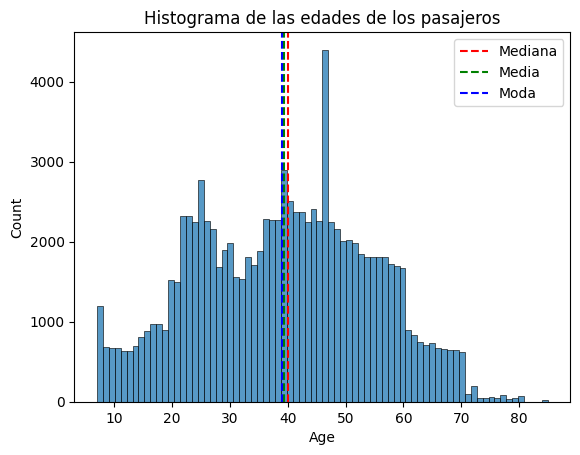

In [ ]:
# Se grafica un histograma de la variable Age
import statistics
sns.histplot(x="Age", data=df2, legend=False)
plt.title('Histograma de las edades de los pasajeros')
mediana_age = statistics.median(df2['Age'])
plt.axvline(mediana_age, color='red', linestyle='--', label='Mediana')
media_age = statistics.mean(df2['Age'])
plt.axvline(media_age, color='green', linestyle='--', label='Media')
moda_age = statistics.mode(df2['Age'])
plt.axvline(moda_age, color='blue', linestyle='--', label='Moda')
plt.legend();

In [ ]:
# Se obtiene el valor de la mediana, media y moda de la variable Age
print(mediana_age)
print(media_age)
print(moda_age)

40
39.288781947191794
39


Además se realiza un boxplot para visualizar de manera gráfica la distribución de los registros y confirmar si existen valores outliers en la misma.

En este caso se puede decir que el 50% de los pasajeros que volaron tienen entre 28 y 51 años aproximadamente. Además no se visualizan valores atípicos que afecten el calculo de resultados estadísticos.

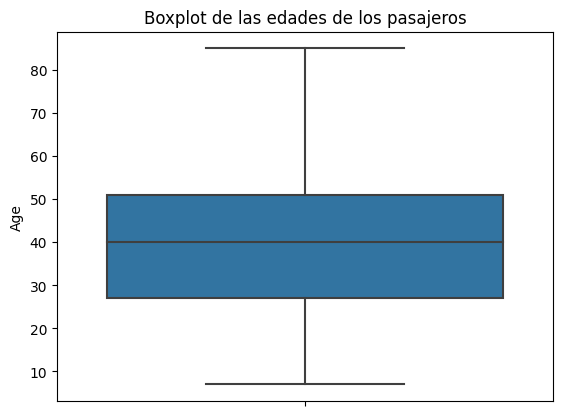

In [ ]:
# Se grafica un boxplot de la variable Age
sns.boxplot(y="Age", data=df2)
plt.title('Boxplot de las edades de los pasajeros');

Buscando un poco más de especificaciones en torno a la variable edad, se dividió la misma entre mayores y menores. Los mayores se componen de aquellos pasajeros con 18 años o más. Los menores son aquellos con 17 años o menos. Teniendo en cuenta esta división se observa que el 92.3% de los pasajeros es mayor de 18 años.

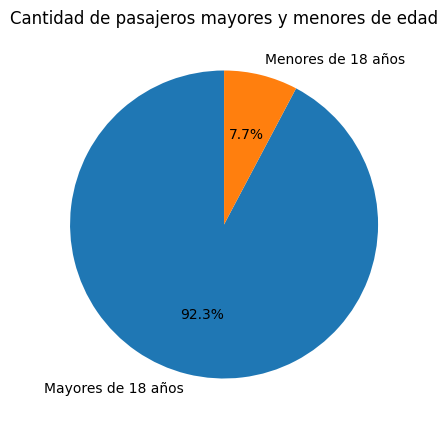

In [ ]:
#  Se realiza un gráfico de torta
df2['Mayor']=df2.Age >=18
mayor18= df2['Mayor'].value_counts()
desc = ['Mayores de 18 años', 'Menores de 18 años']
fig,ax = plt.subplots(figsize =(8, 5))
ax.pie(mayor18, labels=desc, startangle=90, autopct='%1.1f%%')
ax.set_title('Cantidad de pasajeros mayores y menores de edad');

## 4.2. ¿Qué distancia tienen los vuelos realizados por los pasajeros encuestados?

En el histograma presentado a continuación se puede observar dispersión de las distancias de los vuelos que han realizado los pasajeros encuestados.
Además se graficaron 3 medidas de tendencia central como la mediana, la media y la moda. Los valores de las mismas son:

Mediana: 814 km

Media o promedio: 1128.63 km

Moda: 337 km

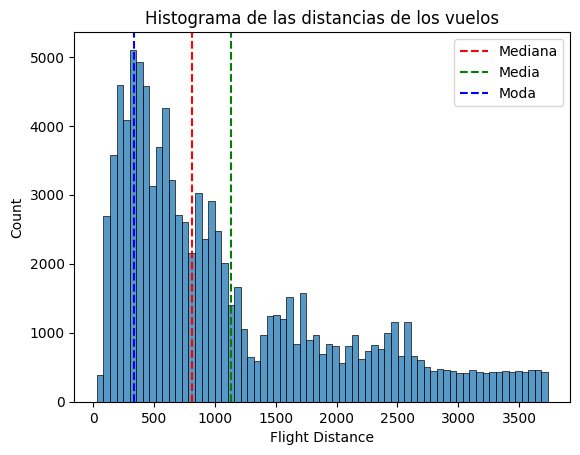

In [ ]:
# Se grafica un histograma de la variable Flight Distance
sns.histplot(df2, x='Flight Distance')
plt.title('Histograma de las distancias de los vuelos')
mediana_flight = statistics.median(df2['Flight Distance'])
plt.axvline(mediana_flight, color='red', linestyle='--', label='Mediana')
media_flight = statistics.mean(df2['Flight Distance'])
plt.axvline(media_flight, color='green', linestyle='--', label='Media')
moda_flight = statistics.mode(df2['Flight Distance'])
plt.axvline(moda_flight, color='blue', linestyle='--', label='Moda')
plt.legend();

In [ ]:
# Se obtiene el valor de la mediana, media y moda de la variable Flight Distance
print(mediana_flight)
print(media_flight)
print(moda_flight)

814
1128.6325371753614
337


Además se realiza un boxplot para visualizar de manera gráfica la distribución de los registros.

En este caso se puede decir que el 50% de los pasajeros encuestados volaron distancias entre 490 y 1700 km aproximadamente. En dicho gráfico se pueden visualizar valores atípicos.

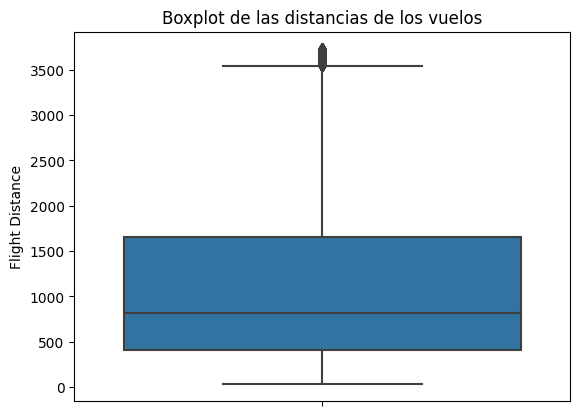

In [ ]:
# Se grafica un boxplot de la variable Flight Distance
sns.boxplot(y="Flight Distance", data=df2)
plt.title('Boxplot de las distancias de los vuelos');

Igualmente se obtiene un promedio de distancia de vuelo de los mayores y los menores. Para los mayores el promedio de las distancias de los vuelos es de 1148 km aproximadamente. A diferencia de los menores que este promedio es menor y es 899 km aproximadamente.

In [ ]:
# Se obtiene el promedio segun mayor y menor
grupo_por_edad = df2.groupby("Mayor")
grupo_por_edad['Flight Distance'].mean()

Mayor
False     898.829457
True     1147.922523
Name: Flight Distance, dtype: float64

## 4.3. ¿Qué clase utilizaron los pasajeros para viajar?

Para comenzar con el análisis se realiza un gráfico de torta para graficar el porcentaje de cada clase de aquellos pasajeros encuestados.

En el mismo se visualiza que la clase en la que mayormente viajaron los pasajeros encuestados es la de **Business** con un 46.7%. Seguida por la clase **Económica** con un 46% y finalmente la clase **Económica Plus** con un 7.4%.

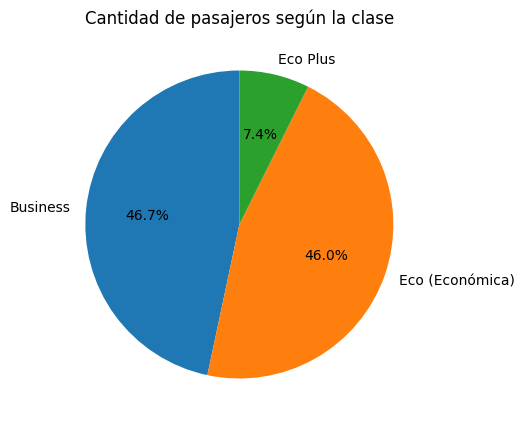

In [ ]:
# Se realiza un grafico de torta de la variable Class
cant_clase= df2['Class'].value_counts()
fig,ax = plt.subplots(figsize =(8, 5))
desc= ['Business', 'Eco (Económica)', 'Eco Plus']
ax.pie(cant_clase, labels=desc, startangle=90, autopct='%1.1f%%')
ax.set_title('Cantidad de pasajeros según la clase');

Luego para continuar con el análisis se realiza un histograma en el cual se observa la distribución por edad del pasajero según la clase en la cual viajó. El objetivo de este gráfico es obtener la distribución de la edad dependiendo de la clase.

Se observa en el gráfico que la clase Eco (Económica) es la más utilizada por todos los menores de 18 años. Igualmente, se puede visualizar que la clase Business tiene un crecimiento en cantidad de pasajeros menores.

Ademas se visualiza que la clase Business es la más elegida por los pasajeros del rango de edad que va de los 25 a los 60 años aproximadamente. Igualmente esta elección también es predominante en pasajeros de aproximadamente 70 años o más.

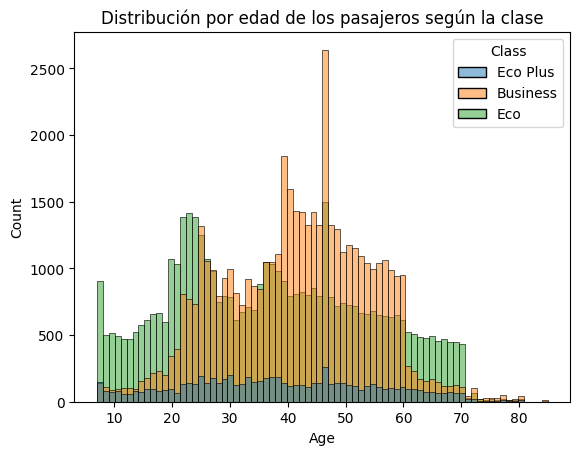

In [ ]:
# Se grafica un histograma
sns.histplot(x='Age', hue='Class', data=df2)
plt.title('Distribución por edad de los pasajeros según la clase');

Para finalizar el análisis, se presenta un boxplot en donde se utiliza la variable de las distancias de los vuelos por clase.

Se visualiza que el 50% de los viajes realizados en clase Business varían entre 600 y 2500 km aproximadamente. En el mismo no observan valores atípicos. Para la clase Económica Plus y Económica, el 50% de las distancias de vuelo varían entre 400 y 1000 km aproximadamente; y se observan valores outliers. Es decir que para ambas clases el comportamiento de las observaciones es similar.

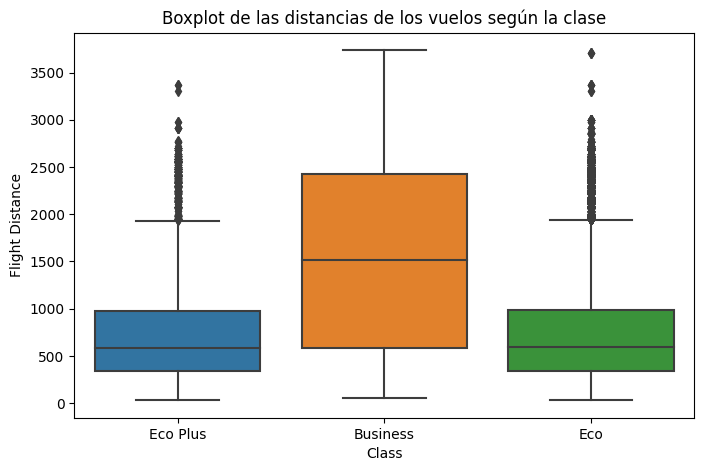

In [ ]:
# # Se realizan gráficos de boxplot segun las variables Flight Distance y Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y="Flight Distance", data=df2)
plt.title('Boxplot de las distancias de los vuelos según la clase');

## 4.4. ¿Qué nivel de satisfacción tienen los pasajeros?

Para iniciar el análisis se realiza un gráfico de torta para obtener el porcentaje de pasajeros con los niveles de satisfacción "satisfecho" y "neutral o insatisfecho".

Se observa en el gráfico que el 42.6% de los pasajeros se encuentra "satisfecho" en su nivel de satisfacción.

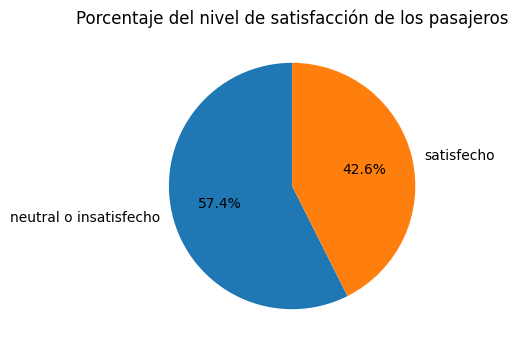

In [ ]:
# Se realiza un gráfico de torta de la variable satisfaction
satisf= df2['satisfaction'].value_counts()
desc=['neutral o insatisfecho', 'satisfecho']
fig,ax = plt.subplots(figsize =(8, 4))
ax.pie(satisf, labels=desc, startangle=90, autopct='%1.1f%%')
ax.set_title('Porcentaje del nivel de satisfacción de los pasajeros');

Luego para seguir con el análisis se determina que tipo de viaje realiza cada pasajero y su nivel de satisfacción.

Se verifica en el gráfico que los pasajeros que viajaron por motivo personal, en su gran mayoría tienen el nivel de satisfacción "neutral o insatisfecho". En cambio los pasajeros que viajaron por motivos de trabajo, mayoritariamente se encuentran "satisfechos", pero el nivel "neutral o insatisfecho" tambien es alto.

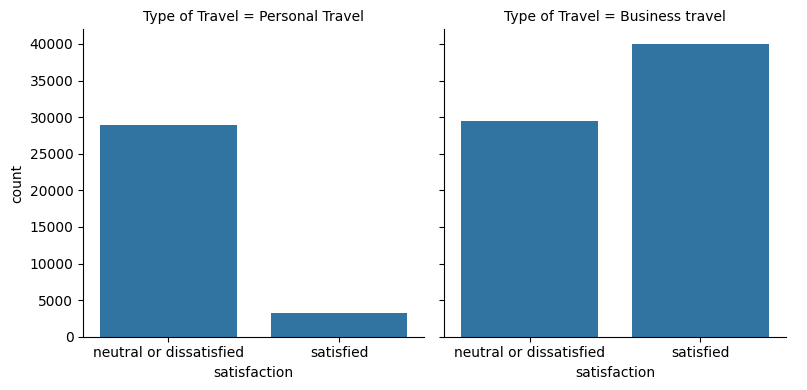

In [ ]:
# Se realizan gráficos de barra segun las variables Type of Travel y satisfaction
ax = sns.FacetGrid(df2, col = "Type of Travel", height=4)
ax.map_dataframe(sns.countplot, x = "satisfaction", data=df2)
ax.add_legend();

Continuando con el análisis, se realiza una apertura del nivel de satisfacción según la clase en la que viajaron los pasajeros encuestados.

Se visualiza que los pasajeros con nivel de satisfacción "neutral o insatisfecho", la mayoría volaron en clase Económica. En cambio los pasajeros cuyo nivel de satisfacción es "satisfecho", en su mayoría viajaron en clase Business.

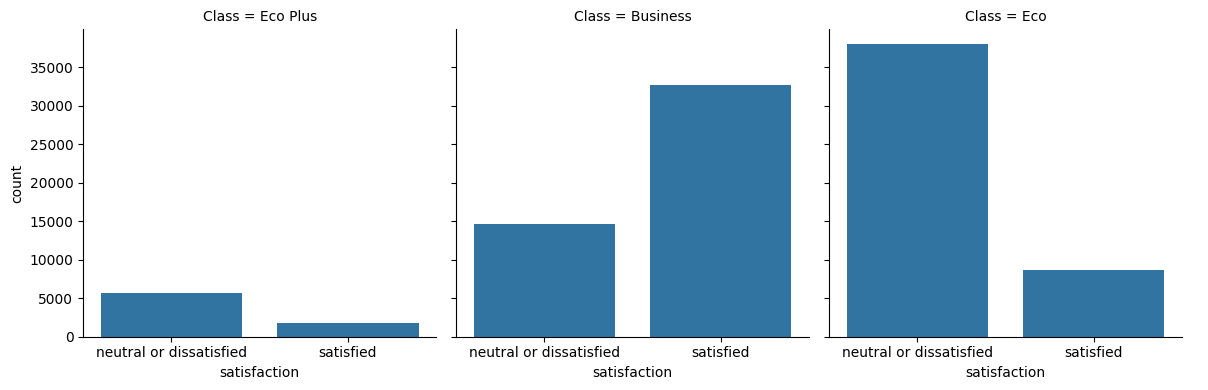

In [ ]:
# Se realizan gráficos de barra segun las variables Type of Travel y satisfaction
ax = sns.FacetGrid(df2, col = "Class", height=4)
ax.map_dataframe(sns.countplot, x = "satisfaction", data=df2)
ax.add_legend();

Para complementar el análisis anterior, se realiza un histograma para visualizar la distribución de la edad de los pasajeros encuestados según el nivel de satisfacción.

Se puede observar una gran cantidad de neutrales o insatisfechos con respecto a su nivel de satisfacción, pero en el rango de 39 a 60 años el nivel de satisfacción "satisfecho" es mucho mayor que el "neutral o insatisfecho".

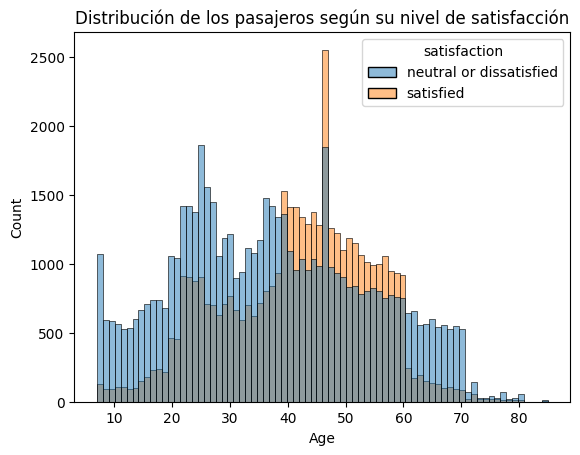

In [ ]:
# Se grafica un histograma de la variable Age según la variable satisfaction
sns.histplot(data=df2, x="Age", hue="satisfaction")
plt.title("Distribución de los pasajeros según su nivel de satisfacción");

## 4.5. ¿Hay relaciones entre las variables del dataframe?

Como el dataset posee variables numéricas y categóricas (ordinales y nominales). Para iniciar con el análisis de las relaciones entre estas variables se plantea un heatmap del dataset. Antes de analizar el gráfico, se establece que las únicas variables numéricas son:

- Age

- Flight Distance

- Departure Delay in Minutes

- Arrival Delay in Minutes

Teniendo en cuenta estas variables, el heatmap permite determinar el nivel de relación entre variables. En el caso de la relación entre Age y Flight Distance el coeficiente es bajo, por lo que indica que no hay una fuerte relación entre ambas variables. Por el contrario sucede entre las variables Departure Delay in Minutes y Arrival Delay in Minutes, donde el coeficiente es cercano a 1, lo que indica una fuerte relación entre ambas.

<ipython-input-34-d2c464903cc6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot = True, cmap = 'PuBu')


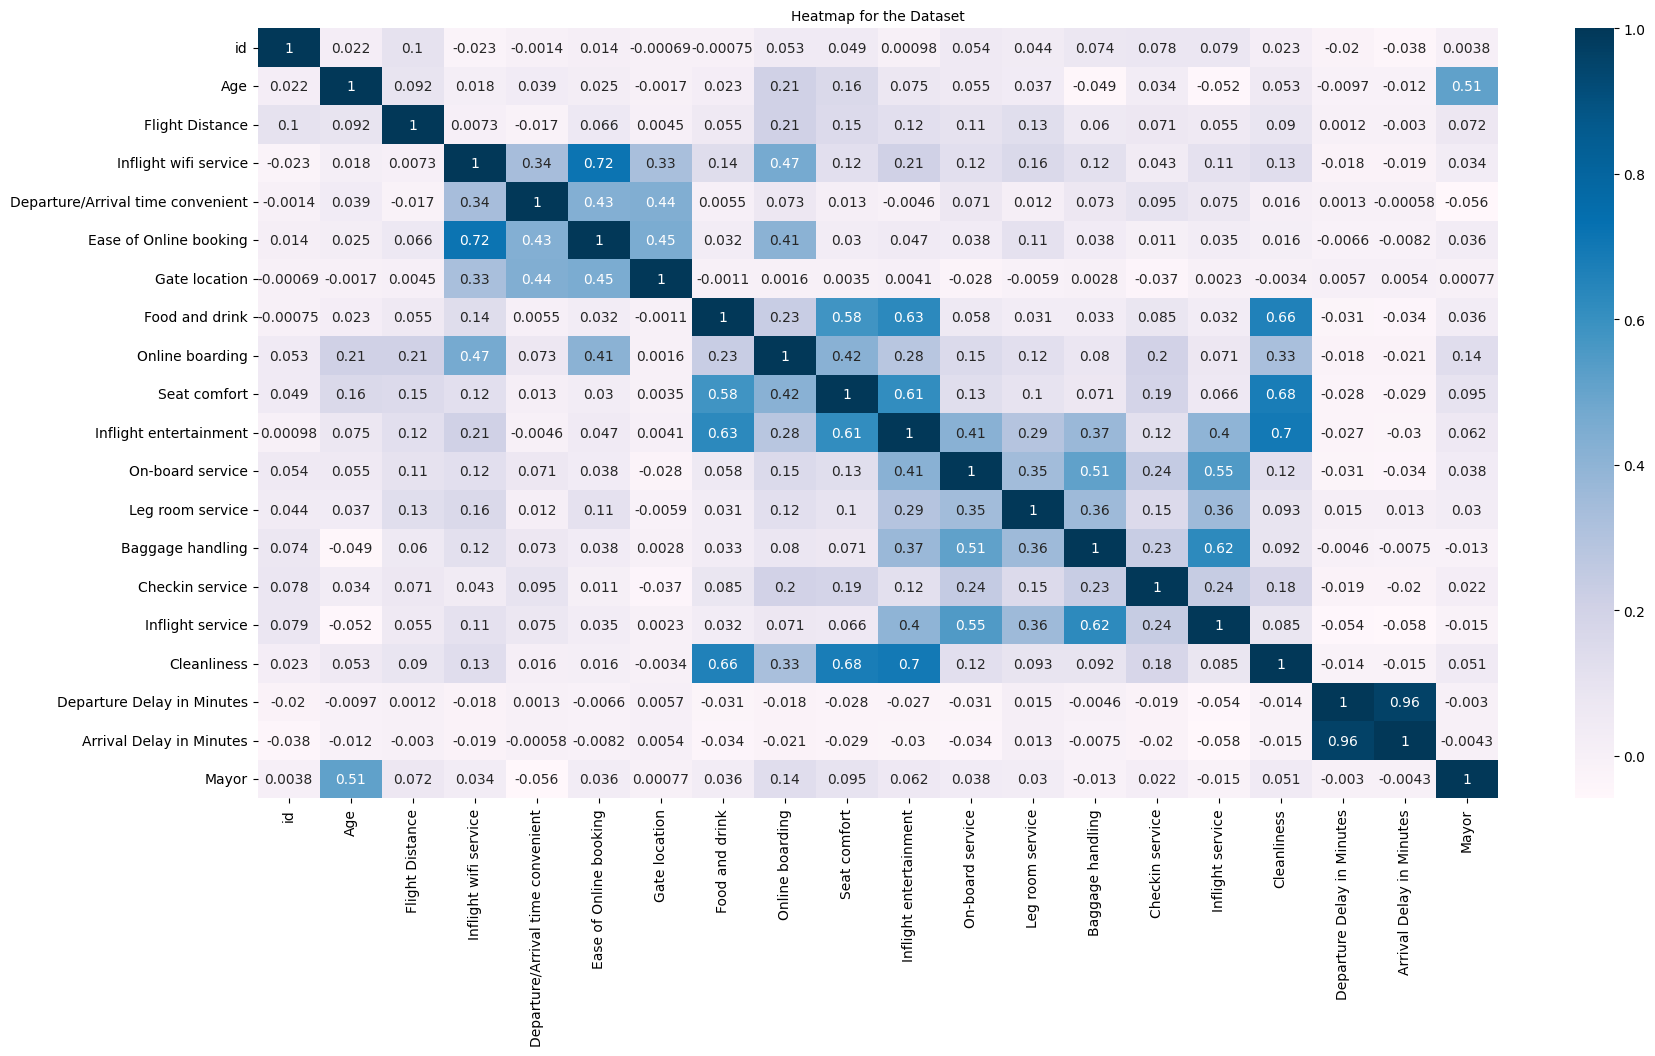

In [ ]:
# Se realiza el heatmap
plt.rcParams['figure.figsize'] = (20, 10)

sns.heatmap(df2.corr(), annot = True, cmap = 'PuBu')
plt.title('Heatmap for the Dataset', fontsize = 10)
plt.show();

En el caso de variables categóricas nominales, podemos realizar una tabla de contingencia para poder establecer la existencia de relación entre las siguientes variables binarias como:

- Type of Travel

- satisfaction

In [ ]:
# Se realiza la tabla de contingencia
pd.crosstab(df2['Type of Travel'], df2['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,29405,39995
Personal Travel,28940,3273


Analizando el coeficiente phi, se puede establecer que algun tipo de relación negativa existe entre ambas variables, no es una relación perfectamente negativa ya que su valor debería ser -1.

In [ ]:
#Se calcula el coeficiente phi
(29405 * 3273 - 28940 * 39995) / np.sqrt((29405 + 39995)*(28940 + 3273)*(29405 + 28940)*(39995 + 3273))

-0.44670611635665197

Finalmente también podemos realizar una tabla de contingencia para establecer alguna relación entre las variables:

- Gender

- satisfaction

In [ ]:
# Se realiza la tabla de contingencia
pd.crosstab(df2['Gender'], df2['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,29917,21644
Male,28428,21624


Analizando el coeficiente phi, se puede establecer que casi NO existe relación entre ambas variables ya que el valor del coeficiente es cercano a 0. Es decir que es indistinto el genero del pasajero teniendo en cuenta su nivel de satisfacción.

In [ ]:
#Se calcula el coeficiente phi
(29917 * 21624 - 28428 * 21644) / np.sqrt((29917 + 21644)*(28428 + 21624)*(29917 + 28428)*(21644 + 21624))

0.012391867291117433

## 4.6. Obtención de insights

- El promedio de los pasajeros tiene 39 años aproximadamente.

- El 50% de los pasajeros que volaron tienen entre 28 y 51 años aproximadamente.

- El 92.3% de los pasajeros es mayor de 18 años.

- En promedio los pasajeros encuestados viajaron 1128 km.

- El 50% de los pasajeros encuestados volaron distancias entre 450 y 1700 km aproximadamente.

- Para los mayores el promedio de las distancias de los vuelos es de 1148 km aproximadamente. A diferencia de los menores que este promedio es menor y es 899 km aproximadamente.

- La clase en la que mayormente viajaron los pasajeros encuestados es la de Business con un 46.7%. Seguida por la clase Económica con un 46% y finalmente la clase Económica Plus con un 7.4%.

- La clase Business es la más elegida por los pasajeros del rango de edad que va de los 25 a los 60 años aproximadamente.

- El 50% de los viajes realizados en clase Business varían entre 700 y 2500 km aproximadamente.

- El 50% de las distancias de vuelo varían entre 300 y 1000 km aproximadamente para la clase Económica Plus y Económica.

- El 42.6% de los pasajeros se encuentra "satisfecho" en su nivel de satisfacción.

- Los pasajeros que viajaron por motivo personal, en su gran mayoría tienen el nivel de satisfacción "neutral o insatisfecho".

- Los pasajeros que viajaron por motivos de trabajo, mayoritariamente se encuentran "satisfechos".

- En el rango de 39 a 60 años el nivel de satisfacción "satisfecho" es mucho mayor que el "neutral o insatisfecho".

- Los pasajeros con nivel de satisfacción "neutral o insatisfecho", la mayoría volaron en clase Económica.

- Los pasajeros cuyo nivel de satisfacción es "satisfecho", en su mayoría viajaron en clase Business.

# **5. MCA**

Para implementar MCA es necesario tomar las variables categóricas deldataset. Por este motivo, se eliminar las variables númericas para quedarse con las categóricas.

In [ ]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import prince

In [ ]:
# Se eliminar las variables númericas del dataset
df3 = df.drop(columns=['Age','id', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'])
df3.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3


Con el objetivo de calcular y graficar MCA, se toma una muestra del dataset ya que es muy grande.

In [ ]:
# Se toma una muestra del dataset (30%)
df4 = df3.sample(frac = 0.03, random_state = 1234)
df4.shape

(3117, 18)

In [ ]:
# Se realiza MCA
mca = prince.MCA(
    n_components=5,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=1234
)
mca = mca.fit(df4)

In [ ]:
# Se determina que porcentaje de la varianza captura cada una de estos 5 componentes
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.232,6.24%,6.24%
1,0.179,4.80%,11.04%
2,0.171,4.61%,15.64%
3,0.164,4.42%,20.06%
4,0.151,4.06%,24.12%


Estos 5 componentes capturan el 24.12% de la varianza. Este porcentaje no es muy alto por lo que nos indica que el gráfico que vamos a realizar no va a ser muy reprensentativo por no explican tan bien la variabilidad.

Se establece que variables son más importante para la descripción del dataset. Es decir que me brinda una medida de la improtancia de cada variable. En este caso, la más importante el servicio de wifi en el vuelo ("Inflight wifi service").

In [ ]:
# Se determina cual de todas las variables tiene más peso
mca.column_coordinates(df4)[0].sort_values()

Inflight entertainment_1   -1.228302
Food and drink_1           -1.123279
Seat comfort_1             -1.079866
Cleanliness_1              -1.059253
Cleanliness_2              -0.908251
                              ...   
Gate location_5             0.738190
Inflight entertainment_5    0.846540
Online boarding_5           0.847911
Ease of Online booking_5    0.882504
Inflight wifi service_5     1.144641
Name: 0, Length: 85, dtype: float64

In [ ]:
# Se grafica el MCA
mca.plot(
    df4,
    x_component=0,
    y_component=1
)

alt.Chart(...)

Esto permite caracterizar un conjunto de pasajeros de la aerolínea. Por ejemplo aquellos que se encuentran **muy insatisfechos** con el servicio que son aquellas observaciones ubicadas arriba y a la izquierda y que seleccionaron lo siguiente:
- Inflight entertainment_1
- Food and drink_1
- Seat comfort_1
- Cleanliness_1
- Online boarding_0
- Ease of Online booking_0
- Inflight wifi service_0
- Leg room service_0

También tenemos por otro lado, aquellos usuario que se encuentran conformes con el servicio de la aerolinea y son las observaciones ubicadas en el medio y a la derecha del gráfico. Los mismos son los que seleccionaron:
- Inflight wifi service_5
- Inflight entertainment_5
- Online boarding_5
- Ease online booking_5
- On-board service_5
- Cleanliness_5
- Seat comfort_5
- Gate location_5
- Baggage handiing_5
- Inflight service_5
- Food and drink_5

Esto permite hacer una separación entre usuarios para buscar una caracterización y responder a la pregunta ¿Cómo son nuestros pasajeros?

# **6. Machine Learning model**

El dataset que continuamos analizando se compone de 25 columnas, de las cuales 24 corresponden a variables independientes. De este total se seleccionarán aquellas variables determinantes para predecir el target.

Como el dataset ya posee la "etiqueta" en la variable *satisfaction* ("satisfecho" o "neutral o insatisfecho") quiero aplicar un problema de clasificación en el cual se utiliza el método de machine learning para predecir la clase más probable, ya que la variable es de tipo categórica. Se utilizarán la mayoría de las variables, pero aquellas variables categóricas es necesario que se transformen en variables numéricas (dummies) para que los modelos funcionen.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Inicialmente, antes de aplicar los algoritmos seleccionados, es necesario transformar las variables categóricas "Gender", "Customer Type", "Type of Travel" y "Class" en variables numéricas (dummies)

In [ ]:
# Se convierten las variables categóricas en numéricas
le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Customer Type'] = le.fit_transform(df2['Customer Type'])
df2['Type of Travel'] = le.fit_transform(df2['Type of Travel'])
df2['Class'] = le.fit_transform(df2['Class'])

Como la fuente de datos de donde se extrajo el dataset posee una base de datos para train y una para test, el dataset de train se utiliza todo completo para los modelados.

Luego, se elimina la variable etiqueta a predecir del dataset. Además se eliminan del mismo aquellas variables innecesarias (id y mayor) y finalmente, se seleccionan las etiquetas.

In [ ]:
# Se elimina la columna "etiqueta" del dataset
X = df2.drop(columns=['satisfaction','id', 'Mayor'])

In [ ]:
# Se seleccionan las etiquetas (la última columna)
y = df2.satisfaction

Para continuar, se realiza el mismo proceso pero, en este caso, en el dataset de test.

In [ ]:
# Se obtienen los datos de test
url1='https://raw.githubusercontent.com/diegosanchezkramm/Data-Science/main/test.csv'
df_test= pd.read_csv(url1, index_col=0)

Se ajusta el dataframe de test teniendo en cuenta las modificaciones que se han realizado en el dataframe original que se usará para el entrenamiento.

In [ ]:
# Se reemplazan los valores nulos del df_test
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(0)

# Se convierten las variables categóricas a numéricas en el df de test
le = LabelEncoder()
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Customer Type'] = le.fit_transform(df_test['Customer Type'])
df_test['Type of Travel'] = le.fit_transform(df_test['Type of Travel'])
df_test['Class'] = le.fit_transform(df_test['Class'])

# Se elimina la columna "etiqueta" del df de test
X_test = df_test.drop(columns=['satisfaction','id'])

# Se seleccionan las etiquetas (la última columna) en la base de test
y_test = df_test.satisfaction

## 6.1. Decision Tree

Inicialmente se entrena el modelo de árbol de decisión.

In [ ]:
# Se calcula el modelo
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

DecisionTreeClassifier(random_state=1234)

In [ ]:
# Prediccion en Test
y_test_pred = tree.predict(X_test)
tree_proba = tree.predict_proba(X_test)[:,1]

Utilizamos el metodo k-fold para obtener el accuracy del árbol de decisión (utilizando los datos de train).

In [ ]:
from sklearn.model_selection import cross_val_score

# Se calcula el método kfold
scores = cross_val_score(tree, X, y, scoring="accuracy", cv=None ,verbose=1)

In [ ]:
# Se reporta el performance (accuracy)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.944 (0.002)


Luego determinamos qué variables del modelo son las más importantes.

In [ ]:
# Calculo de la importancia de cada variable
tree.feature_importances_

array([0.00190794, 0.0411022 , 0.02263151, 0.14794472, 0.02164482,
       0.0239255 , 0.17980118, 0.00449781, 0.00397456, 0.02082693,
       0.00442305, 0.35928004, 0.01574157, 0.0462932 , 0.00943542,
       0.01214415, 0.0146169 , 0.02775451, 0.01591636, 0.00858388,
       0.00798037, 0.00957339])

Teniendo en cuenta el gráfico, las features o varibales más importantes del modelo son "Online boarding", "Inflight wifi service" y "Type of Travel" ya que son las que tienen el porcentaje más alto.

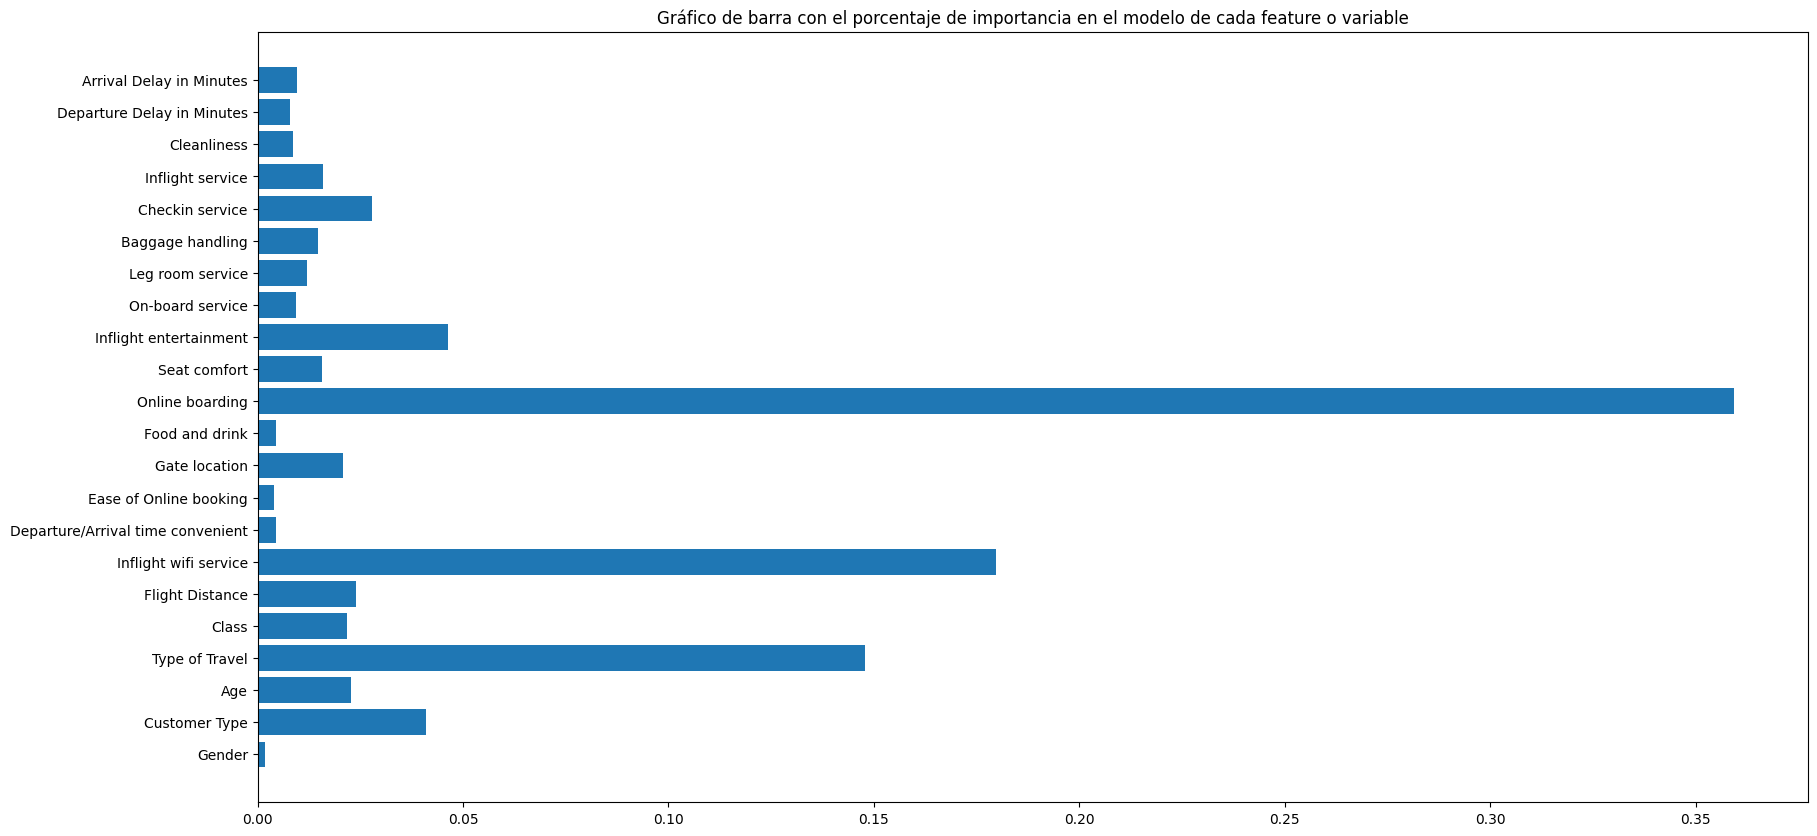

In [ ]:
# Gráfico de las varibles con su importancia
plt.barh(X.columns.values.tolist(), tree.feature_importances_)
plt.title ('Gráfico de barra con el porcentaje de importancia en el modelo de cada feature o variable');

### 6.1.1. Métricas

####6.1.1.1. Accuracy

El accuracy del modelo con un 94.56% nos indica el porcentaje de predicciones correctas o aciertos sobre el total. En este caso, esta métrica es significativa ya que el dataset está balanceado.

In [ ]:
from sklearn.metrics import accuracy_score

# Se calcula el accuracy del modelo
accuracy_score(y_test,y_test_pred)

0.9456036341238065

####6.1.1.2. Matriz de confusión

La matriz de confusión nos indica que la predicción y la realidad de los valores verdaderos (true) (valor "satisfacción") y los valores negativos (valor "neutral o insatisfacción) son muy superiores a los valores falsos (false). Esto nos indica que el modelo tiene un buen desempeño.

In [ ]:
from sklearn.metrics import confusion_matrix

# Se calcula la matriz de confusión
confusion_matrix(y_test, y_test_pred)

array([[13871,   702],
       [  711, 10692]])

####6.1.1.3. Precision

La precisión del modelo es un 93.83% que nos permite detectar los valores verdaderos positivos (valor "satisfacción"). Es decir que nos permite determinar el rendimiento en la predicción de los valores que me interesa predecir o detectar, es decir a cuentos les estoy acertando con la predicción. En este caso, busco predecir aquellos pasajeros "satisfechos".

In [ ]:
from sklearn.metrics import precision_score

# Se calcula la precisión
precision_score(y_test, y_test_pred, pos_label='satisfied')

0.9383886255924171

####6.1.1.4. Recall

El recall del modelo es un 93.76% que nos permite detectar los valores verdaderos positivos (valor "satisfacción"). Es decir que nos permite determinar el porcentaje de recupero de la predicción de los valores que me interesa detectar, en este caso aquellos pasajeros "satisfechos".

In [ ]:
from sklearn.metrics import recall_score

# Se calcula el recall
recall_score(y_test, y_test_pred, pos_label='satisfied')

0.9376479873717443

####6.1.1.4. *F1* score

El F1 score es una métrica que tiene en cuenta la precisión y el recall, es una especio de promedio de ambas métricas calculadas anteriormente. En este caso el porcentaje es 93.80%.

In [ ]:
from sklearn.metrics import f1_score

# Se caclula el f1 score
f1_score(y_test, y_test_pred, pos_label='satisfied')

0.938018160284248

## 6.2. Random Forest

Inicialmente se entrena el modelo de random forest.

In [ ]:
# Se calcula el modelo
forest = RandomForestClassifier(random_state=1234, n_estimators=100,
                               class_weight="balanced", max_features="log2")
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=1234)

In [ ]:
# Prediccion en Test
y_test_pred2 = forest.predict(X_test)
forest_proba = forest.predict_proba(X_test)[:,1]

Luego determinamos qué variables del modelo son las más importantes.

In [ ]:
# Calculo de la importancia de cada variable
forest.feature_importances_

array([0.00475001, 0.03782551, 0.03292616, 0.10838864, 0.07446028,
       0.03730899, 0.14105321, 0.01685855, 0.04266182, 0.01721872,
       0.01158154, 0.18323194, 0.03538658, 0.06222029, 0.03338363,
       0.03958888, 0.02242392, 0.02270118, 0.02338341, 0.02823393,
       0.0115296 , 0.01288319])

Teniendo en cuenta el gráfico, las features o variables más importantes del modelo son "Online boarding", "Inflight wifi service", "Type of Travel", "Class" y "Inflight entertainment" ya que son las que tienen el valor más alto.

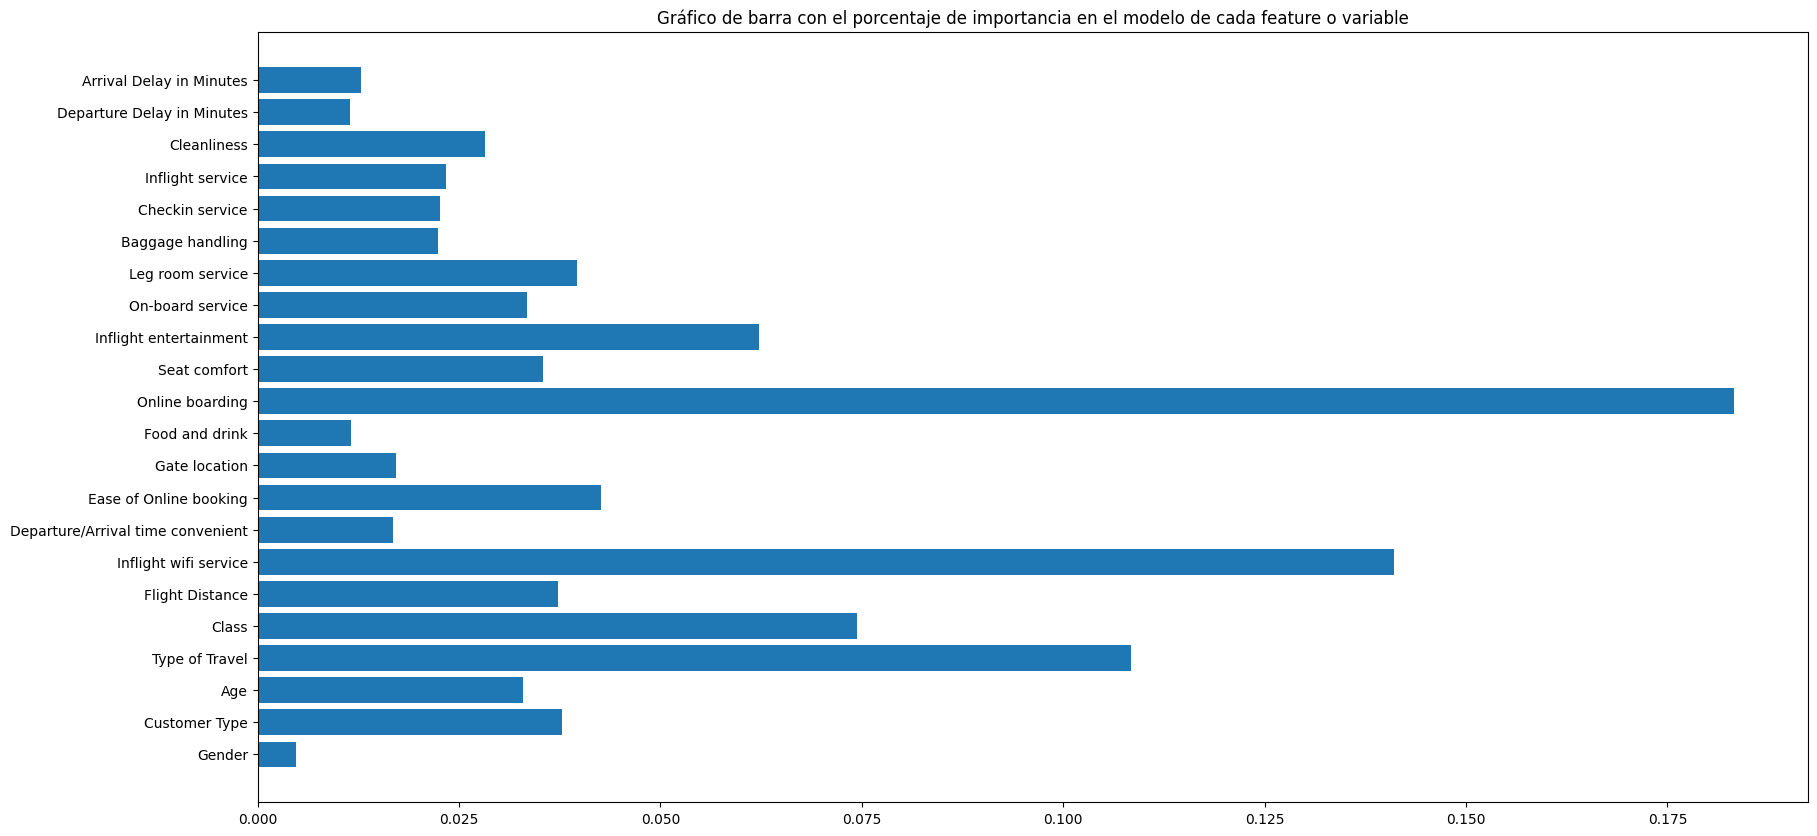

In [ ]:
# Gráfico de las varibles con su importancia
plt.barh(X.columns.values.tolist(), forest.feature_importances_)
plt.title ('Gráfico de barra con el porcentaje de importancia en el modelo de cada feature o variable');

### 6.2.1. Métricas

####6.2.1.1. Accuracy

El accuracy del modelo con un 96.31% nos indica el porcentaje de predicciones correctas o aciertos sobre el total. En este caso, esta métrica es significativa ya que el dataset está balanceado.

In [ ]:
from sklearn.metrics import accuracy_score

# Se calcula el accuracy del modelo
accuracy_score(y_test,y_test_pred2)

0.96311980289498

####6.2.1.2. Matriz de confusión

La matriz de confusión nos indica que la predicción y la realidad de los valores verdaderos (true) (valor "satisfacción") y los valores negativos (valor "neutral o insatisfacción) son muy superiores a los valores falsos (false). Esto nos indica que el modelo tiene un buen desempeño.


In [ ]:
from sklearn.metrics import confusion_matrix

# Se calcula la matriz de confusión
confusion_matrix(y_test, y_test_pred2)

array([[14282,   291],
       [  667, 10736]])

####6.2.1.3. Precision

La precisión del modelo es un 97.36% que nos permite detectar los valores verdaderos positivos (valor "satisfacción"). Es decir que nos permite determinar el rendimiento en la predicción de los valores que me interesa predecir o detectar, es decir a cuentos les estoy acertando con la predicción. En este caso, busco predecir aquellos pasajeros "satisfechos".

In [ ]:
from sklearn.metrics import precision_score

# Se calcula la precisión
precision_score(y_test, y_test_pred2, pos_label='satisfied')

0.9736102294368368

####6.2.1.4. Recall

El recall del modelo es un 94.15% que nos permite detectar los valores verdaderos positivos (valor "satisfacción"). Es decir que nos permite determinar el porcentaje de recupero de la predicción de los valores que me interesa detectar, en este caso aquellos pasajeros "satisfechos".

In [ ]:
from sklearn.metrics import recall_score

# Se calcula el recall
recall_score(y_test, y_test_pred2, pos_label='satisfied')

0.9415066210646321

####6.2.1.4. *F1* score

El F1 score es una métrica que tiene en cuenta la precisión y el recall, es una especio de promedio de ambas métricas calculadas anteriormente. En este caso el porcentaje es 95.72%.

In [ ]:
from sklearn.metrics import f1_score

# Se caclula el f1 score
f1_score(y_test, y_test_pred2, pos_label='satisfied')

0.9572893446277306

## 6.3. Curva ROC

La curva ROC calcula el área bajo la curva de cada uno de los modelos para identificar cuál es mejor que otro. Para iniciar la construcción de la curva, se visualizan los valores de la variable y_test para verificar cómo son. Se observa que y_test estaba codificado como "satisfied" y "neutral or dissatisfied" y para calcular la curva ROC la función necesita recibir 0 y 1. Para continuar se convierte el valor "satisfied" en 1 y el valor "neutral or dissatisfied" en 0 y se crea una lista nueva llamada y_test_num.

In [ ]:
# Se visualiza como es y_test
y_test

0                      satisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 25976, dtype: object

In [ ]:
# Se reemplazan los valores de y_test y se crea una lista nueva llamada y_test_num
y_test_num = [1 if label == 'satisfied' else 0 for label in y_test]

In [ ]:
# Se calcula la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
tree_fpr, tree_tpr, tree_umbral = roc_curve((y_test_num), tree_proba)
forest_fpr, forest_tpr, forest_umbral = roc_curve((y_test_num), forest_proba)

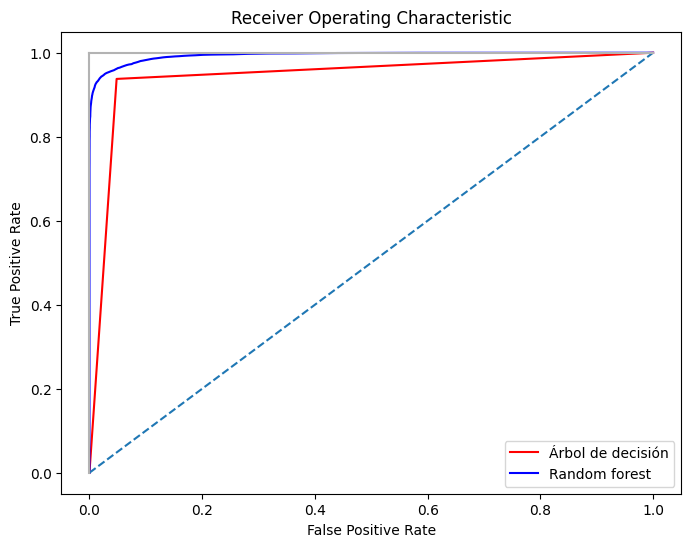

In [ ]:
# Se grafica la curva ROC
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(tree_fpr, tree_tpr, color = "red", label = "Árbol de decisión")
plt.plot(forest_fpr, forest_tpr, color = "blue", label = "Random forest")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Se calcula la superficie debajo de cada curva
print('roc_auc_score for DecisionTree: ', roc_auc_score((y_test_num), tree_proba))
print('roc_auc_score for RandomForest: ', roc_auc_score((y_test_num), forest_proba))

roc_auc_score for DecisionTree:  0.9447383558625002
roc_auc_score for RandomForest:  0.9938235966668552


En este caso, la curva del modelo RandomForest tiene un valor superior al Árbol, por lo cual significa que posee un mejor desempeño.